# 1. graph.py

module that allows generating the graph of the parameterized city

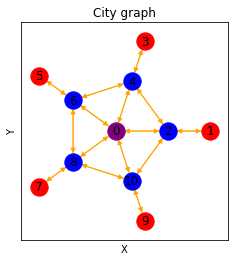

In [1]:
# import graph module
from sidermit.city import Graph

# symetric parameters
n=5 
L=10 #[Km]
g=0.8
P=2 #[Km]

# build city graph with simmetryc parameters
graph_obj = Graph.build_from_parameters(n=n, l=L, g=g, p=P)

# plot graph and save figure in a file_path
graph_obj.plot("sidermit_city.png")


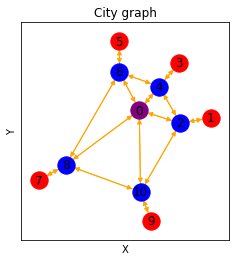

In [2]:
# symetric parameters
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asimmetryc parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# plot graph and save figure in a file_path
graph_obj.plot("sidermit_city.png")

# save graph in a pajek file
graph_obj.graph_to_pajek_file("sidermit_city.PAJEK")

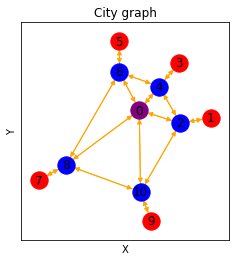

In [3]:
# file path
file_path = "sidermit_city.PAJEK"

# build city graph with a pajek file
graph_obj = Graph.build_from_file(file_path)

# plot graph and save figure in a file_path
graph_obj.plot("sidermit_city.png")

In [4]:
# file path
file_path = "sidermit_city.PAJEK"

# build city graph with a pajek file
graph_obj = Graph.build_from_file(file_path)

# get parameters information
n, L, g, P, etha, etha_zone, angles, Gi, Hi = graph_obj.get_parameters()

print("parameters information")
print("n: {}, L: {}, g: {}, P: {}".format(n, L, g, P))
print("etha: {}, etha_zone: {}".format(etha, etha_zone))
print("angles: {}".format(angles))
print("Gi: {}, Hi: {}".format(Gi, Hi))

# get information of the graph
zones = graph_obj.get_zones()
nodes = graph_obj.get_nodes()
edges = graph_obj.get_edges()

print("")
print("zones information")
for zone in zones:
    print("zone: {}, subcenter: {}, periphery: {}".format(zone.id, zone.subcenter.name, zone.periphery.name))

print("")
print("nodes information")
for node in nodes:
    print("node: {}, id: {}, x: {:.2f}, y: {:.2f}".format(node.name, node.id, node.x, node.y))

# to get a dictionary with node distance if exist a edge in the graph
edge_distance = graph_obj.get_edges_distance()
print("")
print("edges information")
for edge in edges:
    print("id: {}, node_i: {}, node_j: {}, distance: {:.2f}".format(edge.id, edge.node1.name, edge.node2.name, edge_distance[edge.node1.id][edge.node2.id]))

parameters information
n: 5, L: 10.0, g: 0.5, P: 2.0
etha: 0.5, etha_zone: 2
angles: [9.999999999999975, 50.0, 90.0, 210.0, 290.0]
Gi: [0.9999999999999998, 1.0, 1.0, 1.0, 1.0], Hi: [1.0, 1.0, 1.0, 1.0, 1.0]

zones information
zone: 1, subcenter: SC_1, periphery: P_1
zone: 2, subcenter: SC_2, periphery: P_2
zone: 3, subcenter: SC_3, periphery: P_3
zone: 4, subcenter: SC_4, periphery: P_4
zone: 5, subcenter: SC_5, periphery: P_5

nodes information
node: CBD, id: 0, x: 3.21, y: 3.83
node: P_1, id: 1, x: 14.77, y: 2.60
node: SC_1, id: 2, x: 9.85, y: 1.74
node: P_2, id: 3, x: 9.64, y: 11.49
node: SC_2, id: 4, x: 6.43, y: 7.66
node: P_3, id: 5, x: 0.00, y: 15.00
node: SC_3, id: 6, x: 0.00, y: 10.00
node: P_4, id: 7, x: -12.99, y: -7.50
node: SC_4, id: 8, x: -8.66, y: -5.00
node: P_5, id: 9, x: 5.13, y: -14.10
node: SC_5, id: 10, x: 3.42, y: -9.40

edges information
id: 1, node_i: P_1, node_j: SC_1, distance: 5.00
id: 2, node_i: SC_1, node_j: P_1, distance: 5.00
id: 3, node_i: SC_1, node_j: C

# 2. demand.py

module that allows generating the OD matrix

In [5]:
from sidermit.city import Graph
# import demand module
from sidermit.city import Demand

# symetric parameters graph
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters graph
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290] #each angle in range [0°-360°] with respect x+ axis
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# symmetric parameters demand
Y = 10000 #[trips/hr]
a = 0.5
alpha = 1/3
beta = 1/3

# build OD matrix with symmetric parameters
demand_obj = Demand.build_from_parameters(graph_obj, Y, a, alpha, beta)

# to get matrix like as a dictionary: keys: [node_id_O][node_id_D]; value: vij
matrixOD = demand_obj.get_matrix()

# matrix information
for node_id_O in matrixOD:
    for node_id_D in matrixOD[node_id_O]:
        vij =  matrixOD[node_id_O][node_id_D]
        print("Origin_id: {}, Destination_id: {}, vij: {:.2f}".format(node_id_O, node_id_D, vij))
        
# save matrix in a file
demand_obj.matrix_to_file("matrix_od.csv")


Origin_id: 0, Destination_id: 0, vij: 0.00
Origin_id: 0, Destination_id: 1, vij: 0.00
Origin_id: 0, Destination_id: 2, vij: 0.00
Origin_id: 0, Destination_id: 3, vij: 0.00
Origin_id: 0, Destination_id: 4, vij: 0.00
Origin_id: 0, Destination_id: 5, vij: 0.00
Origin_id: 0, Destination_id: 6, vij: 0.00
Origin_id: 0, Destination_id: 7, vij: 0.00
Origin_id: 0, Destination_id: 8, vij: 0.00
Origin_id: 0, Destination_id: 9, vij: 0.00
Origin_id: 0, Destination_id: 10, vij: 0.00
Origin_id: 1, Destination_id: 0, vij: 333.33
Origin_id: 1, Destination_id: 1, vij: 0.00
Origin_id: 1, Destination_id: 2, vij: 333.33
Origin_id: 1, Destination_id: 3, vij: 0.00
Origin_id: 1, Destination_id: 4, vij: 83.33
Origin_id: 1, Destination_id: 5, vij: 0.00
Origin_id: 1, Destination_id: 6, vij: 83.33
Origin_id: 1, Destination_id: 7, vij: 0.00
Origin_id: 1, Destination_id: 8, vij: 83.33
Origin_id: 1, Destination_id: 9, vij: 0.00
Origin_id: 1, Destination_id: 10, vij: 83.33
Origin_id: 2, Destination_id: 0, vij: 500.00

In [6]:
# build from file
demand_obj = Demand.build_from_file(graph_obj, "matrix_od.csv")

# change value vij, you need to give node_id as a string
demand_obj.change_vij(origin_node_id=0, destination_node_id=1, vij=500)

# to get matrix like as a dictionary: keys: [node_id_O][node_id_D]; value: vij
matrixOD = demand_obj.get_matrix()

# matrix information
vij =  matrixOD[0][1]
print("Origin_id: {}, Destination_id: {}, vij: {:.2f}".format(0, 1, vij))


Origin_id: 0, Destination_id: 1, vij: 500.00


# 3. mode.py 

module that allows to generate the transport modes

In [7]:
from sidermit.publictransportsystem import TransportMode

# build a Transport mode with parameters
name = "train"
bya = 1 #boarding and alighting simultaneously (take value 1, if not 0)
co = 2 #Unitary cost per vehicle per period of time [US$/h-veh]
c1 = 2 #Unitary cost per seat per period of time [US$/h-veh]
c2 = 2 #Unitary cost per vehicle per km of time [US$/h-veh]
v = 20 #Cruise speed [km/h]
t = 4 #Boarding and alighting time [s/pax]
fmax = 50 #Maximum frequency [veh/h]
kmax = 500 #Maximum vehicle size [pax/veh]
theta = 0.5 #regularity of arrival of the mode of transport at the stops
tat = 5 #Technological access time [min]
d = 2 #Parallel lines
fini = 28 #Initial frequency [veh/h]

train_obj = TransportMode(name, bya, co, c1, c2, v, t, fmax, kmax, theta, tat, d, fini)

# build default mode
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# print information
print("name: {}, fmax: {}, kmax: {}".format(train_obj.name, train_obj.fmax, train_obj.kmax))
print("name: {}, fmax: {}, kmax: {}".format(bus_obj.name, bus_obj.fmax, bus_obj.kmax))
print("name: {}, fmax: {}, kmax: {}".format(metro_obj.name, metro_obj.fmax, metro_obj.kmax))


name: train, fmax: 50, kmax: 500
name: bus, fmax: 150, kmax: 160
name: metro, fmax: 40, kmax: 1440


# 4. passenger.py

module that allows to generate the passengers

In [8]:
from sidermit.publictransportsystem import passenger

# build a passenger with parameters
va = 6 #Walking speed [km/h]
pv = 1 #Value of in-vehicle time savings [US$/h]
pw = 2 #Value of waiting time savings [US$/h]
pa = 3 #Value of access time savings [US$/h]
pt = 4 #Pure transfer penalty [EIV]
spv = 1 #Subjetive value of in-vehicle time savings [US$/h]
spw = 2 #Subjetive value of waiting time savings [US$/h]
spa = 3 #Subjetive value of access time savings [US$/h]
spt = 4 #Subjetive pure transfer penalty [EIV]

passenger_obj = passenger.Passenger(va, pv, pw, pa, pt, spv, spw, spa, spt)

print("v: {}".format(passenger_obj.va))

# build default passenger
passenger_obj = passenger.Passenger.get_default_passenger()

print("v: {}".format(passenger_obj.va))


v: 6
v: 4.0


# 5. network.py

module that allows to generate the transport network

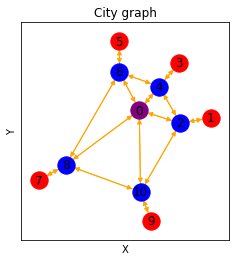

In [9]:
from sidermit.publictransportsystem import TransportNetwork, Route

# symetric parameters graph city
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters graph city
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asimmetryc parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# build a network without routes
network_obj = TransportNetwork(graph_obj)
# plot network (without routes yet)
network_obj.plot("sidermit.png")


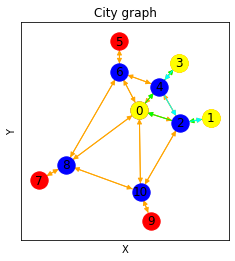

In [10]:
# build a custom route
route_id = "custom_route"
custom_mode = TransportMode("custom_mode", 0, 1, 1, 2, 30, 2, 30, 400, 1, 0, 1, 28) # to build a custom mode
# string with node_id sequences
nodes_sequence_i = "1,2,0,4,3" #outward direction
nodes_sequence_r = "3,4,2,1" #return direction
# string with node_id sequences (STOPS)
stops_sequence_i = "1,0,3" #outward direction
stops_sequence_r = "3,1" #return direction
# custom route
custom_route = Route(route_id, custom_mode, nodes_sequence_i, nodes_sequence_r, stops_sequence_i, stops_sequence_r)

# add route and its respective mode of transport to the network 
# observation: there can only be two modes of transport in the network
network_obj.add_route(custom_route)

# plot network
network_obj.plot("sidermit.png")

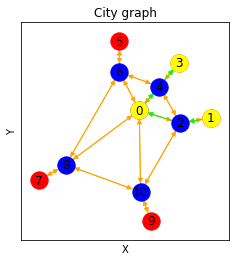

In [11]:
# plot only a direction ("I" or "R")
network_obj.plot("sidermit.png", direction="I")

functions of elimination of routes or modes of transport and their precautions

In [12]:
print("before remove")
print("n° routes: {}".format(len(network_obj.get_routes())))
print("n° modes: {}".format(len(network_obj.get_modes())))

# To remove a Transport mode in the network
# if you remove a transport mode you remove all routes with this respective transport mode
network_obj.remove_transport_mode(custom_mode)

print()
print("after remove transport mode")
print("n° routes: {}".format(len(network_obj.get_routes())))
print("n° modes: {}".format(len(network_obj.get_modes())))

# add route and its respective mode of transport to the network 
# observation: there can only be two modes of transport in the network
network_obj.add_route(custom_route)

print()
print("after add a route")
print("n° routes: {}".format(len(network_obj.get_routes())))
print("n° modes: {}".format(len(network_obj.get_modes())))

# to remove only a route, transport mode is not remove
network_obj.remove_route("custom_route")

print()
print("after remove a route")
print("n° routes: {}".format(len(network_obj.get_routes())))
print("n° modes: {}".format(len(network_obj.get_modes())))


# To remove a Transport mode in the network
# if you remove a transport mode you remove all route with this respective transport mode
network_obj.remove_transport_mode(custom_mode)

print()
print("after remove a transport mode")
print("n° routes: {}".format(len(network_obj.get_routes())))
print("n° modes: {}".format(len(network_obj.get_modes())))



before remove
n° routes: 1
n° modes: 1

after remove transport mode
n° routes: 0
n° modes: 0

after add a route
n° routes: 1
n° modes: 1

after remove a route
n° routes: 0
n° modes: 1

after remove a transport mode
n° routes: 0
n° modes: 0


In [13]:
# to get predefined routes (CIRCULAR; FEEDER; RADIAL; DIAMETRAL; TANGENCIAL)

# get default modes_obj
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# predefined routes
# only creation, not added to the transportation network
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
circular_route = network_obj.get_circular_routes(mode_obj=metro_obj)
radial_route = network_obj.get_radial_routes(mode_obj=metro_obj, short=False, express=False)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=2, short=False, express=False)
tangencial_route = network_obj.get_tangencial_routes(mode_obj=bus_obj, jump=2, short=False, express=False)

# get information of the routes
print("feeder routes: {}".format(len(feeder_route)))
print("circular routes: {}".format(len(circular_route)))
print("radial routes: {}".format(len(radial_route)))
print("diametral routes: {}".format(len(diametral_route)))
print("tangencial routes: {}".format(len(tangencial_route)))

print()
print("Information tangencial routes")
for route in tangencial_route:
    print("route_id: {}".format(route.id))
    print("\tmode_name: {}".format(route.mode.name))
    print("\tnode_sequence_i: {}".format(route.nodes_sequence_i))
    print("\tstop_sequence_i: {}".format(route.stops_sequence_i))
    print("\tnode_sequence_r: {}".format(route.nodes_sequence_r))
    print("\tstop_sequence_r: {}".format(route.stops_sequence_r))
    



feeder routes: 5
circular routes: 2
radial routes: 5
diametral routes: 5
tangencial routes: 5

Information tangencial routes
route_id: T2_bus_1
	mode_name: bus
	node_sequence_i: [1, 2, 4, 6, 5]
	stop_sequence_i: [1, 2, 4, 6, 5]
	node_sequence_r: [5, 6, 4, 2, 1]
	stop_sequence_r: [5, 6, 4, 2, 1]
route_id: T2_bus_2
	mode_name: bus
	node_sequence_i: [3, 4, 6, 8, 7]
	stop_sequence_i: [3, 4, 6, 8, 7]
	node_sequence_r: [7, 8, 6, 4, 3]
	stop_sequence_r: [7, 8, 6, 4, 3]
route_id: T2_bus_3
	mode_name: bus
	node_sequence_i: [5, 6, 8, 10, 9]
	stop_sequence_i: [5, 6, 8, 10, 9]
	node_sequence_r: [9, 10, 8, 6, 5]
	stop_sequence_r: [9, 10, 8, 6, 5]
route_id: T2_bus_4
	mode_name: bus
	node_sequence_i: [7, 8, 10, 2, 1]
	stop_sequence_i: [7, 8, 10, 2, 1]
	node_sequence_r: [1, 2, 10, 8, 7]
	stop_sequence_r: [1, 2, 10, 8, 7]
route_id: T2_bus_5
	mode_name: bus
	node_sequence_i: [9, 10, 2, 4, 3]
	stop_sequence_i: [9, 10, 2, 4, 3]
	node_sequence_r: [3, 4, 2, 10, 9]
	stop_sequence_r: [3, 4, 2, 10, 9]


In [14]:
# to add diametral and circular routes to transport network
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)

# get all routes in network:obj
routes = network_obj.get_routes()

print()
print("numbers of routes in network: {}".format(len(routes)))

# print routes_id in network
print()
print("routes_id created")
for route in routes:
    print(route.id)
        



numbers of routes in network: 7

routes_id created
D2_bus_1
D2_bus_2
D2_bus_3
D2_bus_4
D2_bus_5
CIR_I_metro
CIR_R_metro


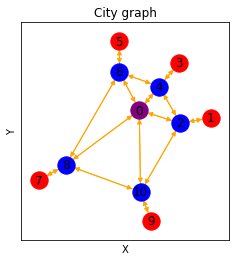

In [15]:
# print only city graph
network_obj.plot("sidermit.png", list_routes=[])

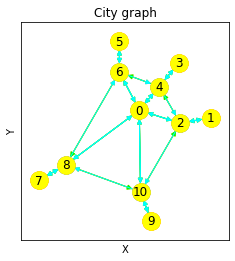

In [16]:
# print all routes and city graph
network_obj.plot("sidermit.png")

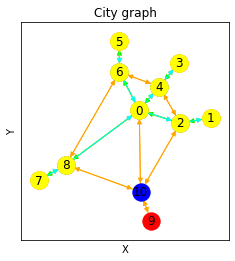

In [17]:
# print list of routes and city graph
network_obj.plot("sidermit.png", list_routes=["D2_bus_1", "D2_bus_2"])

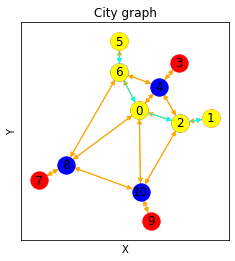

In [18]:
# print list of routes, city graph and a particular direction "I" or "R"
network_obj.plot("sidermit.png", list_routes=["D2_bus_1"], direction="R")

# 6. extended_graph.py

to create extended graph

In [19]:
#                                    Representation extended graph
#
# for each p,sc y CBD:                _______________city_node_______________
#                                     ↑                  ↑                   ↑
#                                access_edge        access_edge          access_edge
#                                     ↓                  ↓                   ↓
# for each mode:                  stop_node (mode1)  stop_node (mode2)    stop_node (mode3)
#                                 |       ↑          |       ↑            |       ↑
#                             boarding alighting  boarding alighting   boarding alighting
#                               edge      edge      edge     edge        edge     edge
#                                 ↓       |          ↓       |            ↓       |
# for each route, direction      route_node           route_node          route_node
#                                     ↑                    ↑                   ↑
#                                route_edge             route_edge         route_edge
#                                     ↑                    ↑                   ↑
# relation with other city_node  route_node(i-1)      route_node(i-1)     route_node(i-1)

In [20]:
from sidermit.city import Graph
from sidermit.publictransportsystem import TransportNetwork, Passenger

# Import extended graph module
from sidermit.optimization.preoptimization import ExtendedGraph

# symetric parameters graph city
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters graph city
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asymmetric parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# get default modes_obj
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# get default passenger
passenger_obj = Passenger.get_default_passenger()

# build a network without routes
network_obj = TransportNetwork(graph_obj)

# predefined routes
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
circular_route = network_obj.get_circular_routes(mode_obj=metro_obj)
radial_route = network_obj.get_radial_routes(mode_obj=metro_obj, short=False, express=False)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=2, short=False, express=False)
tangencial_route = network_obj.get_tangencial_routes(mode_obj=bus_obj, jump=2, short=False, express=False)

# add diametral and circular routes to network_obj
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)
    
# build extended graph
# parameters frequency_routes is a dictionary: dic[route_id] = frequency route [veh/hr],
# if value is None then frequency for all routes is fini parameters of its respective transport mode
extended_graph = ExtendedGraph(graph_obj, network_obj.get_routes(), passenger_obj.spt, frequency_routes=None)

# print extended graph information
print(extended_graph.__str__())


City node
-Graph node name: P_1
	Access edge
	-Access time: 0.00 [min]
		Stop node
		-Mode name: bus
			Boarding edge
			-Frequency: 7.00 [veh/h]
				Route node
				-Route_id: D2_bus_1
				-Direction: I
				-Previous stop: no data
				-Time to previous stop: 0.00 [hrs]
			Alighting edge
			-Penalty transfer: 16.00 [min]
				Route node
				-Route_id: D2_bus_1
				-Direction: R
				-Previous stop: SC_1
				-Time to previous stop: 0.25000000000000006 [hrs]
			Alighting edge
			-Penalty transfer: 16.00 [min]
				Route node
				-Route_id: D2_bus_4
				-Direction: I
				-Previous stop: SC_1
				-Time to previous stop: 0.25000000000000006 [hrs]
			Boarding edge
			-Frequency: 7.00 [veh/h]
				Route node
				-Route_id: D2_bus_4
				-Direction: R
				-Previous stop: no data
				-Time to previous stop: 0.00 [hrs]
City node
-Graph node name: SC_1
	Access edge
	-Access time: 0.00 [min]
		Stop node
		-Mode name: bus
			Boarding edge
			-Frequency: 7.00 [veh/h]
			Alighting edge
			-Penalty transfer

In [21]:
# get extended nodes: dic[CityNode][StopNode] = List[RouteNode]
extended_graph_nodes = extended_graph.get_extended_graph_nodes()
# get extended edges: List[ExtendedEdges]
extended_graph_edges = extended_graph.get_extended_graph_edges()

print("Extended nodes information")
for city_node in extended_graph_nodes:
    for stop_node in extended_graph_nodes[city_node]:
        for route_node in extended_graph_nodes[city_node][stop_node]:
            print("city_node name:{}, stop_node mode: {}, route_node id: {}".format(city_node.graph_node.name, stop_node.mode.name, route_node.route.id))

print()
print("Extended edges information")
for edge in extended_graph_edges:
    print("edge type: {}, t: {:.2f}, f: {:.2f}".format(edge.type, edge.t, edge.f))

Extended nodes information
city_node name:P_1, stop_node mode: bus, route_node id: D2_bus_1
city_node name:P_1, stop_node mode: bus, route_node id: D2_bus_1
city_node name:P_1, stop_node mode: bus, route_node id: D2_bus_4
city_node name:P_1, stop_node mode: bus, route_node id: D2_bus_4
city_node name:SC_1, stop_node mode: bus, route_node id: D2_bus_1
city_node name:SC_1, stop_node mode: bus, route_node id: D2_bus_1
city_node name:SC_1, stop_node mode: bus, route_node id: D2_bus_4
city_node name:SC_1, stop_node mode: bus, route_node id: D2_bus_4
city_node name:SC_1, stop_node mode: metro, route_node id: CIR_I_metro
city_node name:SC_1, stop_node mode: metro, route_node id: CIR_R_metro
city_node name:CBD, stop_node mode: bus, route_node id: D2_bus_1
city_node name:CBD, stop_node mode: bus, route_node id: D2_bus_1
city_node name:CBD, stop_node mode: bus, route_node id: D2_bus_2
city_node name:CBD, stop_node mode: bus, route_node id: D2_bus_2
city_node name:CBD, stop_node mode: bus, route_

# 7. hyper_path.py

to get hyper paths

In [22]:
from sidermit.city import Graph
from sidermit.publictransportsystem import TransportNetwork, Passenger
from sidermit.optimization.preoptimization import ExtendedGraph

# Import Hyperpath module
from sidermit.optimization.preoptimization import Hyperpath

# symetric parameters graph city
n=2 
L=10 #[km]
g=0.5
P=2 #[km]

# build city graph
graph_obj = Graph.build_from_parameters(n, L, g, P)

# build Od_matrix with parameters
demand_obj = Demand.build_from_parameters(graph_obj=graph_obj, y=1000, a=0.5, alpha=1 / 3, beta=1 / 3)
OD_matrix = demand_obj.get_matrix()

# get default modes_obj
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# get default passenger
passenger_obj = Passenger.get_default_passenger()

# build a network without routes
network_obj = TransportNetwork(graph_obj)

# predefined routes
feeder_routes = network_obj.get_feeder_routes(bus_obj)
radial_routes = network_obj.get_radial_routes(metro_obj, short=True)
radial_routes_bus = network_obj.get_radial_routes(bus_obj)
circular_routes = network_obj.get_circular_routes(bus_obj)

# add predefined routes
for route in feeder_routes:
    network_obj.add_route(route)

for route in radial_routes:
    network_obj.add_route(route)

for route in circular_routes:
    network_obj.add_route(route)

for route in radial_routes_bus:
    network_obj.add_route(route)
    
# build extended graph
# parameters frequency_routes is a dictionary: dic[route_id] = frequency route [veh/hr],
# if value is None then frequency for all routes is 28 [veh/hr]
extended_graph = ExtendedGraph(graph_obj, network_obj.get_routes(), passenger_obj.spt, frequency_routes=None)

# get periphery node of the zone with id 1 and cbd node to get a hyperpath between these nodes
extended_graph_nodes = extended_graph.get_extended_graph_nodes()

# to get P1 and CBD nodes
P1 = None
CBD = None
for city_node in extended_graph_nodes:
    if str(city_node.graph_node.name) == "CBD":
        CBD = city_node
    if str(city_node.graph_node.name) == "P_1":
        P1 = city_node

# build hyperpath object
hyperpath_obj = Hyperpath(extended_graph, passenger_obj)
# to get hyperpath with a OD
successors, label, frequencies = hyperpath_obj.build_hyperpath_graph(node_city_origin=P1, node_city_destination=CBD)
# print information all graph
print(hyperpath_obj.string_hyperpath_graph(successors, label, frequencies))



HyperPath Graph
City_node
	-Graph_node_name: P_1
	-label: inf
	-Successor: 
	-Frequencies: 0.00
Stop_node
	-Mode_name: bus
	-Graph_node_name: P_1
	-label: 0.93
	-Successor: [ExtendedEdgesType.BOARDING: Stopnode bus: P_1 - Routenode R_bus_1 I: P_1] [ExtendedEdgesType.BOARDING: Stopnode bus: P_1 - Routenode F_bus_1 I: P_1] 
	-Frequencies: 14.00
Route_node
	-route_id: F_bus_1
	-direction: I
	-Graph_node_name: P_1
	-label: 0.90
	-Successor: [ExtendedEdgesType.ROUTE: Routenode F_bus_1 I: P_1 - Routenode F_bus_1 I: SC_1] 
	-Frequencies: 0.00
Route_node
	-route_id: F_bus_1
	-direction: R
	-Graph_node_name: P_1
	-label: 1.19
	-Successor: [ExtendedEdgesType.ALIGHTING: Routenode F_bus_1 R: P_1 - Stopnode bus: P_1] 
	-Frequencies: 0.00
Route_node
	-route_id: R_bus_1
	-direction: I
	-Graph_node_name: P_1
	-label: 0.75
	-Successor: [ExtendedEdgesType.ROUTE: Routenode R_bus_1 I: P_1 - Routenode R_bus_1 I: SC_1] 
	-Frequencies: 0.00
Route_node
	-route_id: R_bus_1
	-direction: R
	-Graph_node_name: P_1

In [23]:
# get all elemental path in each stop of the origin in a OD pair
hyperpaths_od, label, successors, frequencies = hyperpath_obj.get_hyperpath_OD(P1, CBD)
# print elemental paths in a OD
print(hyperpath_obj.string_hyperpaths_OD(hyperpaths_od, label))



bus stop

	New Path:
		[City_node P_1: inf]
		[Stop_node bus - P_1: 0.9262]
		[Route_node R_bus_1 I - P_1: 0.7500]
		[Route_node R_bus_1 I - SC_1: 0.5000]
		[Route_node R_bus_1 I - CBD: 0.0000]
		[Stop_node bus - CBD: 0.0000]
		[City_node CBD: 0.0000]
		
	New Path:
		[City_node P_1: inf]
		[Stop_node bus - P_1: 0.9262]
		[Route_node F_bus_1 I - P_1: 0.9024]
		[Route_node F_bus_1 I - SC_1: 0.6524]
		[Stop_node bus - SC_1: 0.3857]
		[City_node SC_1: 0.3857]
		[Stop_node metro - SC_1: 0.3357]
		[Route_node RS_metro_1 I - SC_1: 0.3000]
		[Route_node RS_metro_1 I - CBD: 0.0500]
		[Stop_node metro - CBD: 0.0500]
		[City_node CBD: 0.0000]
		


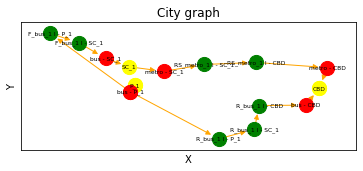

In [24]:
# plot a representation of all hyperpath for a OD pair
hyperpath_obj.plot(hyperpaths_od)

In [25]:
# get all hyperpaths for each OD pair with trips in OD_matrix and print
hyperpaths, labels, successors, frequency, Vij = hyperpath_obj.get_all_hyperpaths(OD_matrix)
# print information about all hyperpaths for all OD with trips
print(hyperpath_obj.string_all_hyperpaths(hyperpaths, labels, successors, Vij))


origin: P_1, destination: CBD, vij: 83.33
	 mode: bus, label: 0.93 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: P_1, destination: SC_1, vij: 83.33
	 mode: bus, label: 0.35 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: P_1, destination: SC_2, vij: 83.33
	 mode: bus, label: 1.53 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: SC_1, destination: CBD, vij: 125.00
	 mode: bus, label: 0.70 [EIV], n° elemental paths: 1, n° elemental paths (successors): 1
origin: SC_1, destination: CBD, vij: 125.00
	 mode: metro, label: 0.39 [EIV], n° elemental paths: 1, n° elemental paths (successors): 1
origin: SC_1, destination: SC_2, vij: 125.00
	 mode: bus, label: 1.10 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: SC_1, destination: SC_2, vij: 125.00
	 mode: metro, label: 0.94 [EIV], n° elemental paths: 1, n° elemental paths (successors): 1
origin: P_2, destination: CBD, vij: 83.33
	 mode: bus, labe

# 8. assignment.py

to obtain allocation of demand in each transport mode for each OD and determine alighting and boardinf for each routes and stops

In [26]:
# to import module
from sidermit.optimization.preoptimization import Assignment

# to build dictionary objects
from collections import defaultdict

# to build graph
graph_obj = Graph.build_from_parameters(n=2, l=10, g=0.5, p=2)
# to build demand
demand_obj = Demand.build_from_parameters(graph_obj=graph_obj, y=100, a=0.5, alpha=1 / 3, beta=1 / 3)
# to build passenger
passenger_obj = Passenger.get_default_passenger()
# to build default transport mode
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# to build network
network_obj = TransportNetwork(graph_obj=graph_obj)

# to get routes
feeder_routes_metro = network_obj.get_feeder_routes(mode_obj=metro_obj)
radial_routes_bus = network_obj.get_radial_routes(mode_obj=bus_obj)

# to add routes
for route in feeder_routes_metro:
    network_obj.add_route(route_obj=route)

for route in radial_routes_bus:
    network_obj.add_route(route_obj=route)

# to build extended graph
extended_graph_obj = ExtendedGraph(graph_obj=graph_obj, routes=network_obj.get_routes(), sPTP=passenger_obj.spt, frequency_routes=None)

# to build hyperpath
hyperpath_obj = Hyperpath(extended_graph_obj=extended_graph_obj, passenger_obj=passenger_obj)

# to get all hyperpaths between all OD pair with trips in OD matrix
hyperpaths, labels, successors, frequency, Vij = hyperpath_obj.get_all_hyperpaths(OD_matrix=demand_obj.get_matrix())

# to get a dictionary with assignment percent of trips between each Transport Mode (StopNode) in each OD pair with trips
# OD_assignment = dic[origin: CityNode][destination: CityNode][Stop: StopNode] = %V_OD
OD_assignment = Assignment.get_assignment(hyperpaths=hyperpaths, labels=labels, p=2,
                                          vp=passenger_obj.va, spa=passenger_obj.spa,
                                          spv=passenger_obj.spv)

# to get all nodes in extended graph
# nodes = dic[CityNode][StopNode] = List[RouteNode]
nodes = extended_graph_obj.get_extended_graph_nodes()


# to get a specific city node (P1, SC1, CBD) in extended graph
P1 = None
SC1 = None
CBD = None

# to get a specific stop node (stop_bus_p1, stop_metro_p1) in extended graph
stop_bus_p1 = None
stop_metro_p1 = None

for city_node in nodes:
    if city_node.graph_node.name == "P_1":
        P1 = city_node
    if city_node.graph_node.name == "SC_1":
        SC1 = city_node
    if city_node.graph_node.name == "CBD":
        CBD = city_node

    for stop_node in nodes[city_node]:
        if stop_node.mode.name == "bus":
            if city_node.graph_node.name == "P_1":
                stop_bus_p1 = stop_node

        if stop_node.mode.name == "metro":
            if city_node.graph_node.name == "P_1":
                stop_metro_p1 = stop_node

# print information about assigment
print("Trips Assignment bus, origin P1, destination CBD: {:.2f}".format(OD_assignment[P1][CBD][stop_bus_p1]))
print("Trips Assignment bus, origin P1, destination CBD: {:.2f}".format(OD_assignment[P1][SC1][stop_bus_p1]))
print("Trips Assignment Metro, origin P1, destination CBD: {:.2f}".format(OD_assignment[P1][SC1][stop_metro_p1]))

# build a dictionary where all route_id defined in network have a defined frequency
f = defaultdict(float)
for route in network_obj.get_routes():
    f[route.id] = 28

# to get alighting [pax/veh] and boarding [pax/veh] for all routes, direction in each stop 
# z = dic[route_id][direction][stop: StopNode] = pax [pax/veh]
# v = dic[route_id][direction][stop: StopNode] = pax [pax/veh]
z, v, loaded_section_route = Assignment.get_alighting_and_boarding(Vij=Vij, hyperpaths=hyperpaths, successors=successors,
                                                     assignment=OD_assignment, f=f)

# to print boarding and alighting information
print(Assignment.str_boarding_alighting(z, v))

# to print a specific boarding and alighting information
print("\nBoarding in Feeder_metro_1, direction I, Stop P_1: {:.2f}".format(z["F_metro_1"]["I"][stop_metro_p1]))

print("\nloaded section per route:")
for route_id in loaded_section_route:
    for direction in loaded_section_route[route_id]:
        for stop_node in loaded_section_route[route_id][direction]:
            load = loaded_section_route[route_id][direction][stop_node]
            print("Route: {}, direction: {}, stop_node: {}, load: {}".format(route_id, direction, stop_node.city_node.graph_node.id, load))



Trips Assignment bus, origin P1, destination CBD: 100.00
Trips Assignment bus, origin P1, destination CBD: 49.88
Trips Assignment Metro, origin P1, destination CBD: 50.12

Boarding and Alighting information:
New route: R_bus_1
	Boarding:
		Direction: I
			Stop bus-P_1: 0.74[pax/veh]
			Stop bus-SC_1: 0.89[pax/veh]
		Direction: R
			Stop bus-CBD: 0.74[pax/veh]
	Alighting:
		Direction: I
			Stop bus-CBD: 1.49[pax/veh]
			Stop bus-SC_1: 0.15[pax/veh]
		Direction: R
			Stop bus-SC_1: 0.74[pax/veh]
New route: F_metro_1
	Boarding:
		Direction: I
			Stop metro-P_1: 0.15[pax/veh]
	Alighting:
		Direction: I
			Stop metro-SC_1: 0.15[pax/veh]
New route: R_bus_2
	Boarding:
		Direction: R
			Stop bus-CBD: 0.74[pax/veh]
		Direction: I
			Stop bus-P_2: 0.74[pax/veh]
			Stop bus-SC_2: 0.89[pax/veh]
	Alighting:
		Direction: R
			Stop bus-SC_2: 0.74[pax/veh]
		Direction: I
			Stop bus-CBD: 1.49[pax/veh]
			Stop bus-SC_2: 0.15[pax/veh]
New route: F_metro_2
	Boarding:
		Direction: I
			Stop metro-P_2: 0.1

# 9. operators_cost.py

to get operators cost

In [27]:
from collections import defaultdict

from sidermit.city import Graph, Demand
from sidermit.optimization.preoptimization import ExtendedGraph, Hyperpath, Assignment
from sidermit.publictransportsystem import Passenger, TransportMode, TransportNetwork
from sidermit.optimization import OperatorsCost

# build city graph
graph_obj = Graph.build_from_parameters(n=2, l=10, g=0.5, p=2)
# build od matrix
demand_obj = Demand.build_from_parameters(graph_obj=graph_obj, y=100000, a=0.5, alpha=1 / 3, beta=1 / 3)
# build passenger
passenger_obj = Passenger.get_default_passenger()
# build transport modes
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# build transport network
network_obj = TransportNetwork(graph_obj=graph_obj)

# build routes
feeder_routes_metro = network_obj.get_feeder_routes(mode_obj=metro_obj)
radial_routes_bus = network_obj.get_radial_routes(mode_obj=bus_obj)

# add routes in transport network
for route in feeder_routes_metro:
    network_obj.add_route(route_obj=route)

for route in radial_routes_bus:
    network_obj.add_route(route_obj=route)

# build extended graph
extended_graph_obj = ExtendedGraph(graph_obj=graph_obj, routes=network_obj.get_routes(), sPTP=passenger_obj.spt,
                                   frequency_routes=None)
# build hyperpath object
hyperpath_obj = Hyperpath(extended_graph_obj=extended_graph_obj, passenger_obj=passenger_obj)

# get all hyperpaths for each OD with trips
hyperpaths, labels, successors, frequency, Vij = hyperpath_obj.get_all_hyperpaths(
    OD_matrix=demand_obj.get_matrix())

# get assigment in each transport mode for each OD
OD_assignment = Assignment.get_assignment(hyperpaths=hyperpaths, labels=labels, p=2,
                                          vp=passenger_obj.va, spa=passenger_obj.spa,
                                          spv=passenger_obj.spv)

# give a specific frequency and capacity for all route id
f = defaultdict(float)
k = defaultdict(float)
for route in network_obj.get_routes():
    f[route.id] = 28
    k[route.id] = 100

# get boarding and alighting for each line in echa stop to a specific frequency (f)
z, v, loaded_section_route = Assignment.get_alighting_and_boarding(Vij=Vij, hyperpaths=hyperpaths, successors=successors,
                                             assignment=OD_assignment, f=f)

# get travel time for each route
lines_travel_time = OperatorsCost.lines_travel_time(routes=network_obj.get_routes(),
                                                    edge_distance=graph_obj.get_edges_distance())
print("Travel time:")
for route_id in lines_travel_time:
    print("route_id: {}, travel_time: {:.5f})".format(route_id, lines_travel_time[route_id]))

# get cycle time for each route
lines_cycle_time = OperatorsCost.get_cycle_time(z, v, network_obj.get_routes(), lines_travel_time)

print()
print("Cycle time:")
for route_id in lines_cycle_time:
    print("route_id: {}, cycle_time: {:.5f})".format(route_id, lines_cycle_time[route_id]))

# get operators cost
cost = OperatorsCost.get_operators_cost(network_obj.get_routes(), lines_cycle_time, f, k)
print()
print("Co = {:.2f}".format(cost))


Travel time:
route_id: F_metro_1, travel_time: 0.25000)
route_id: F_metro_2, travel_time: 0.25000)
route_id: R_bus_1, travel_time: 1.50000)
route_id: R_bus_2, travel_time: 1.50000)

Cycle time:
route_id: F_metro_1, cycle_time: 0.27735)
route_id: F_metro_2, cycle_time: 0.27735)
route_id: R_bus_1, cycle_time: 4.70329)
route_id: R_bus_2, cycle_time: 4.70329)

Co = 7941.09


# 10. users_cost.py

to get users cost

In [28]:
from collections import defaultdict

from sidermit.city import Demand
from sidermit.city import Graph
from sidermit.optimization import UsersCost
from sidermit.optimization.preoptimization import ExtendedGraph, Hyperpath, Assignment
from sidermit.publictransportsystem import TransportMode, TransportNetwork, Passenger

# build city graph
graph_obj = Graph.build_from_parameters(n=2, l=10, g=0.5, p=2)
# build od matrix
demand_obj = Demand.build_from_parameters(graph_obj=graph_obj, y=100, a=0.5, alpha=1 / 3, beta=1 / 3)
# build passenger
passenger_obj = Passenger.get_default_passenger()
# build transport modes
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# build transport network
network_obj = TransportNetwork(graph_obj=graph_obj)

# build routes
feeder_routes_metro = network_obj.get_feeder_routes(mode_obj=metro_obj)
radial_routes_bus = network_obj.get_radial_routes(mode_obj=bus_obj)

# add routes in transport network
for route in feeder_routes_metro:
    network_obj.add_route(route_obj=route)

for route in radial_routes_bus:
    network_obj.add_route(route_obj=route)

# build extended graph
extended_graph_obj = ExtendedGraph(graph_obj=graph_obj, routes=network_obj.get_routes(), sPTP=passenger_obj.spt,
                                   frequency_routes=None)
# build hyperpath
hyperpath_obj = Hyperpath(extended_graph_obj=extended_graph_obj, passenger_obj=passenger_obj)

# get hyperpaths for all OD with trips
hyperpaths, labels, successors, frequency, Vij = hyperpath_obj.get_all_hyperpaths(
    OD_matrix=demand_obj.get_matrix())

# get assigment in each mode for each stop in origin for each OD pair with trips
OD_assignment = Assignment.get_assignment(hyperpaths=hyperpaths, labels=labels, p=2,
                                          vp=passenger_obj.va, spa=passenger_obj.spa,
                                          spv=passenger_obj.spv)

# give a specific frequency for each route
f = defaultdict(float)

for route in network_obj.get_routes():
    f[route.id] = 28

z, v, loaded_section_route = Assignment.get_alighting_and_boarding(Vij=Vij, hyperpaths=hyperpaths, successors=successors,
                                             assignment=OD_assignment, f=f)

# build users cost object 
CU_obj = UsersCost()
# get resources consumed by users
ta, te, tv, t = CU_obj.resources_consumer(hyperpaths, Vij, OD_assignment, successors, extended_graph_obj,
                                          passenger_obj.va, f, z, v)
# get users cost
CU = CU_obj.get_users_cost(hyperpaths, Vij, OD_assignment, successors, extended_graph_obj, f, passenger_obj, z, v)

# print
print("Resources consumed: ta {:.2f} [hrs], te {:.2f} [hrs], tv {:.2f} [hrs], T {:.2f}".format(ta, te, tv, t))
print("CU = {:.2f}".format(CU))

Resources consumed: ta 3.40 [hrs], te 13.48 [hrs], tv 74.03 [hrs], T 41.67
CU = 971.30


# 11. infrastructure_cost.py

to get infrastructure cost


In [29]:
from collections import defaultdict

from sidermit.city import Graph
from sidermit.optimization import InfrastructureCost
from sidermit.publictransportsystem import TransportMode, TransportNetwork


# build graph object
graph_obj = Graph.build_from_parameters(2, 10, 1, 2)
# build transport network
network_obj = TransportNetwork(graph_obj)
# build transport mode
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# build routes
circular = network_obj.get_circular_routes(mode_obj=metro_obj)
radial = network_obj.get_radial_routes(mode_obj=bus_obj)

# add routes in transport network
for route in circular:
    network_obj.add_route(route)

for route in radial:
    network_obj.add_route(route)
    
# give a specific frequency for each route  
f = defaultdict(float)
for route in network_obj.get_routes():
    f[route.id] = 28

# build infrastructure cost object
CI_obj = InfrastructureCost()
# get distance for each transport mode in network object
mode_distance = InfrastructureCost.get_mode_network_distance(graph_obj, network_obj, f=f)
# get infrastructure cost
CI = CI_obj.get_infrastruture_cost(graph_obj, network_obj, f=f)

print("Distance for each mode")
for mode in mode_distance:
    print("mode: {}, distance: {:.2f}".format(mode.name, mode_distance[mode]))

print()
print("CI = {:.2f}".format(CI))

Distance for each mode
mode: bus, distance: 160.00
mode: metro, distance: 20.00

CI = 18663.00


# 12. optimizer


In this module the complete cycle is developed. A city graph, an OD matrix and a transport network are generated to
optimize its operation and return results of the proposed design.

In [30]:
from sidermit.city import Graph, Demand
from sidermit.optimization import Optimizer
from sidermit.publictransportsystem import Passenger, TransportMode
from sidermit.publictransportsystem import TransportNetwork

# build city graph
graph_obj = Graph.build_from_parameters(2, 10, 0.85, 2)
# build OD matrix
demand_obj = Demand.build_from_parameters(graph_obj, 100000, 0.78, 1 / 4, 0.22)
# build passenger
passenger_obj = Passenger.get_default_passenger()
# build transport modes
[bus_obj, metro_obj] = TransportMode.get_default_modes()
# build transport network without lines
network_obj = TransportNetwork(graph_obj)

# build predefined routes
feeder = network_obj.get_feeder_routes(bus_obj)
radial = network_obj.get_radial_routes(metro_obj, short=True)
# resuts with circular routes are not reliables
circular = network_obj.get_circular_routes(metro_obj)

routes = [feeder, radial]

# add lines in transport network
for route_type in routes:
    for route in route_type:
        network_obj.add_route(route)
# build optimizer object
# give information about city graph, od matrix, passenger and transport network
# initial frequency parameters is None for that initial frequency for each transport mode is equal to fini 
opt_obj = Optimizer(graph_obj, demand_obj, passenger_obj, network_obj, f=None)

# res is the result of the optimizer to the transport network
res = opt_obj.network_optimization(graph_obj, demand_obj, passenger_obj, network_obj, f=None, tolerance=0.01)
# to get information about overall results
overall_results = opt_obj.overall_results(res)
print(opt_obj.string_overall_results(overall_results))
# to get information about network results
network_results = opt_obj.network_results(res)
print(opt_obj.string_network_results(network_results))

# to write in a file network results
opt_obj.write_file_network_results("output.csv", network_results)

Internal optimization
	Success: True
	Status: 1
	Message: `gtol` termination condition is satisfied.
	new_f: [243.74500716 243.7450257   39.99951046  39.99951047]
	Constrain violation: 0.0032774159151642834
	VRC: 2209268.690725807
f_norm_distance: 256.56612236969664
Internal optimization
	Success: True
	Status: 1
	Message: `gtol` termination condition is satisfied.
	new_f: [243.74500716 243.7450257   39.99951046  39.99951047]
	Constrain violation: 0.0032774159151642834
	VRC: 2209268.690725807
f_norm_distance: 0.0


Optimization Results
Success: True
Status: 1
Message: `gtol` termination condition is satisfied.
Max constrain violation: 0.0032774159151642834
VRC: 2209268.690725807

Frequency information [veh/hr]: 
	F_bus_1: 243.75
	F_bus_2: 243.75
	RS_metro_1: 40.00
	RS_metro_2: 40.00


Objective function VRC [USD$/hr-pax]: 22.09
Operators cost [USD$/hr-pax]        : 0.43
Infrastructure cost [USD$/hr-pax]   : 0.19
Users cost [USD$/hr-pax]            : 21.48

Resources consumer for users
